# Looking at im2latex-100k data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import argparse

%load_ext autoreload
%autoreload 2

from importlib.util import find_spec
if find_spec("im2latex") is None:
    import sys
    sys.path.append('..')

from im2latex.data.im2latex_100k import Im2Latex100K

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
args = argparse.Namespace(min_count=10, max_label_length=150)
dataset = Im2Latex100K(args)
dataset.prepare_data()
dataset.setup()

In [3]:
x, y = next(iter(dataset.train_dataloader()))
print(x.shape, x.dtype, x.min(), x.mean(), x.std(), x.max())
print(y.shape, y.dtype, y.min(), y.max())

torch.Size([128, 1, 64, 320]) torch.float32 tensor(0.) tensor(0.9290) tensor(0.1877) tensor(1.)
torch.Size([128, 152]) torch.int64 tensor(0) tensor(390)


In [4]:
def convert_y_label_to_string(y, dataset=dataset):
    return ''.join([dataset.mapping[i] for i in y])

y_example = y[0]
print(y_example, y_example.shape)
print(convert_y_label_to_string(y_example))

tensor([  1,  59,  11,  13,  15,   5,  32,  74,   9,  31,  14, 105,  14,  34,
         10,   4,   5,  32,  31,   4,  22,  14,  37,  37,  95,  11,  13,  15,
          5,  32,  74,   9,  31,  14, 105,  14,  34,  10,   4,   5,  32, 105,
          4,  22,  21,   2,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3]) torch.Size([152])
<S>q=-\frac{\partialF(p,Q,t)}{\partialp}\,,\;\;P=-\frac{\partialF(p,Q,t)}{\partialQ}\,.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><

<S>q=-\frac{\partialF(p,Q,t)}{\partialp}\,,\;\;P=-\frac{\partialF(p,Q,t)}{\partialQ}\,.<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>


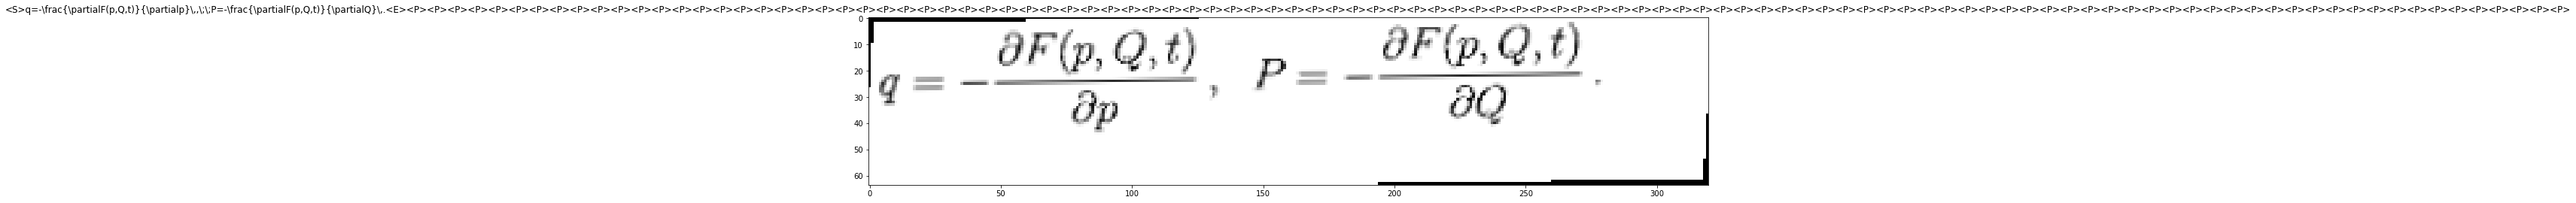

In [5]:
x_example = x[0]
plt.figure(figsize=(20, 20))
# x, y = dataset.data_train[i]
sentence = convert_y_label_to_string(y_example) 
print(sentence)
plt.title(sentence)
plt.imshow(x_example.squeeze(), cmap='gray')
plt.show()